**Jupyter-notebook commands**

For executing cells type: **Ctrl + Enter** in the respective cell

For moving to the next/previous cell use the **arrows** or **mouse**

Insert new cells using the **+** button

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data('/home/barbara/Documents/Codettes/MNIST_data/mnist.npz')

In [ ]:
# TODO: Number of training examples (hint: use the shape command)
n_train = ?
print("Number of training examples =", n_train)

In [ ]:
# TODO: Number of testing examples.
n_test = ?
print("Number of testing examples =", n_test)

In [ ]:
# TODO: What's the shape of an traffic sign image?
image_shape = [?, ?]
print("Image data shape =", image_shape)

In [ ]:
# TODO: How many unique classes/labels there are in the dataset. (hint: use the set command)
n_classes = ?
print("Number of classes =", n_classes)

In [ ]:
# TODO:Plot one training image
# command plt.imshow()
?


In [ ]:
# Check distribution of labels
plt.hist(y_train, n_classes)
plt.ylabel('Number of samples');
plt.xlabel('Class');
plt.legend(['Training samples', 'Validation samples'])

In [ ]:
# Adjust the training set in order to meet the input format used in the original
# paper which is 32x32x1

# Add one axis at the end
X_train = np.expand_dims(x_train, axis=3)
X_test = np.expand_dims(x_test, axis=3)
 
# Pad the images by 2 pixels at each side
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [ ]:
# TODO: print the new shape of the training set
?

In [ ]:
#TODO: Standardization of the training data
mean = X_train.mean().astype(np.float32)
std = X_train.std().astype(np.float32)
X_train = 

In [ ]:
# Convert class labels
print("Label of first training sample =", y_train[0])

One-hot-encoding
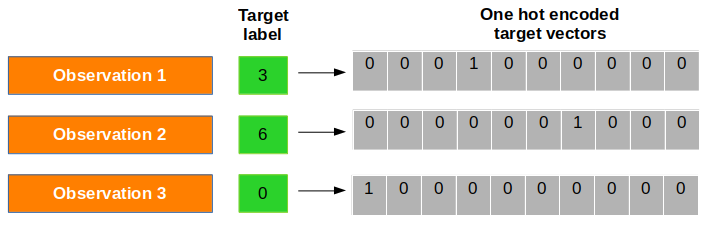

In [ ]:
#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train)

In [ ]:
print("Label of first training sample one-hot-encoded =", Y_train[0])

In [ ]:
# Import all the layers that we need for building up the LeNet architecture
# All core layers are defined here: https://keras.io/layers/core/
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D # 2D convolutional layer
from keras.layers import MaxPooling2D # Max pooling
from keras.layers import Flatten # Flattens the input
from keras.layers import Dense # Fully connected layer

**LeNet5 architecture**
<img src="lenet5.png" alt="drawing" width="1000"/>

**Recap**
- **filters**: how many filters are applied, define number of output layers
- **kernel_size/pool_size**: how big is your filter
- **strides**: how many steps you move the filter over the image

In [ ]:
# TODO: Build up the model
# hint: all convolutional layers use a filter of size 5x5 
#       and RELU activation function

model = Sequential()

#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = ?, 
                 kernel_size = 5, 
                 strides = ?, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))
#Pooling layer 1 (Subsampling)
model.add(MaxPooling2D(pool_size = 2, strides = ?))

#Layer 2
#Conv Layer 2

#Pooling Layer 2


#Flatten the input
model.add(Flatten())

#Layer 3
#Fully connected layer 1
model.add(Dense(units = ?, activation = 'relu'))

#Layer 4
#Fully connected layer 2
model.add(Dense(units = ?, activation = 'relu'))

#Layer 5
#Output Layer
model.add(Dense(units = ?, activation = 'softmax'))

In [ ]:
# Print the model architecture
model.summary()

In [ ]:
# Train the model using Adam optimizer and categorical_crossentropy

# Check if 
## the loss is decreasing
## the accuracy is increasing

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train ,Y_train, epochs = 1)

In [ ]:
# Show one sample test image: TODO: choose a test image
index = ?
plt.imshow(X_test[index][:,:,-1])
test_image = np.expand_dims(X_test[index,:], axis=0)

In [ ]:
# Predict the class of this test image
y_pred = model.predict(test_image)
print("One-hot-encoded output vector = ", y_pred)

# Find the respective class
y_pred_class = np.argmax(y_pred, axis = 1)
print("Predicted class = ", y_pred_class)

In [ ]:
# TODO: Predict on all test data
y_pred = ?

In [ ]:
# TODO: Converting one hot vectors to class labels
pred_labels = ?

In [ ]:
# Compare prediction with ground truth labels
from sklearn.metrics import accuracy_score

print("Accuracy score = ", accuracy_score(y_test, pred_labels))